In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

In [26]:
df=pd.read_csv("/content/drive/MyDrive/temp/play_tennis_dataset.csv")

In [27]:
label_encoders = {}
categorical_features = ['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play']
for col in categorical_features:
    if col in df.columns and df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [28]:
X = df.drop([col for col in ['Play', 'Day'] if col in df.columns], axis=1)


In [29]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [30]:
sample = pd.DataFrame([{
    "Outlook": "Sunny",
    "Temperature": "Cool",
    "Humidity": "High",
    "Wind": "Strong"
}])
print(sample)

  Outlook Temperature Humidity    Wind
0   Sunny        Cool     High  Strong


In [31]:
for col in sample.columns:
    sample[col] = le.fit_transform(sample[col])

prediction = model.predict(sample)

# Decode result
result = "Yes" if prediction[0] == 1 else "No"
print("Prediction (Play Tennis):", result)

Prediction (Play Tennis): Yes


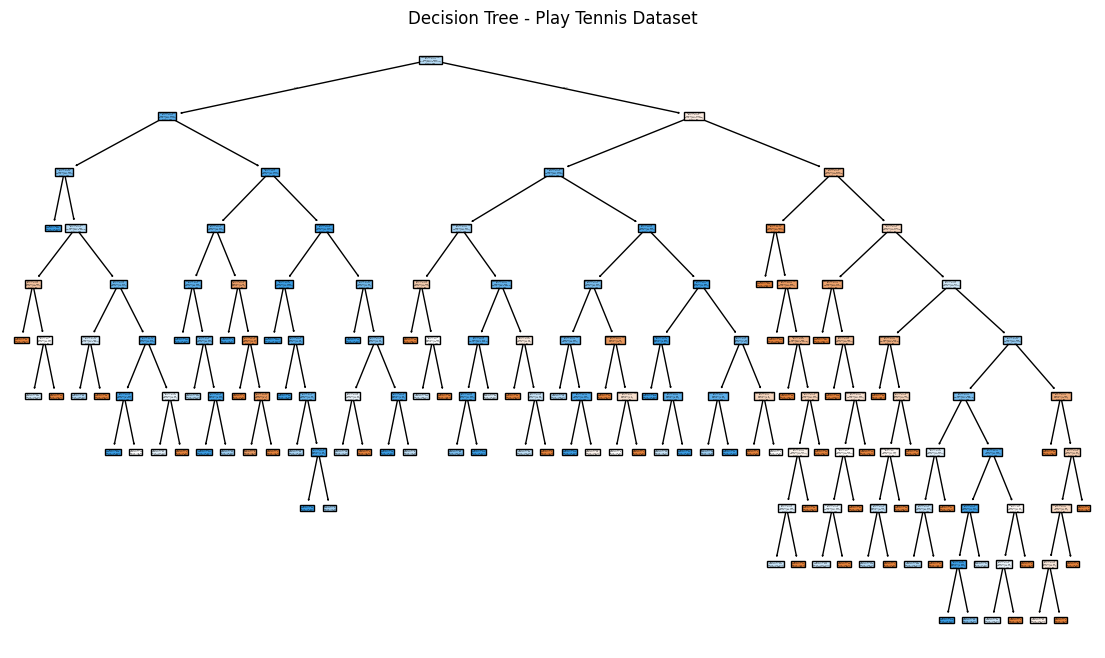

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True
)
plt.title("Decision Tree - Play Tennis Dataset")
plt.show()
